In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.datasets import load_iris  # import data from scikit, different use case
from sklearn.datasets import load_digits 

In [2]:
from sklearn.naive_bayes import GaussianNB

# Find proper algorithm module
[scikit-learn](https://scikit-learn.org/stable/)

In [3]:
# import the data from seaborn as a dataframe.
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


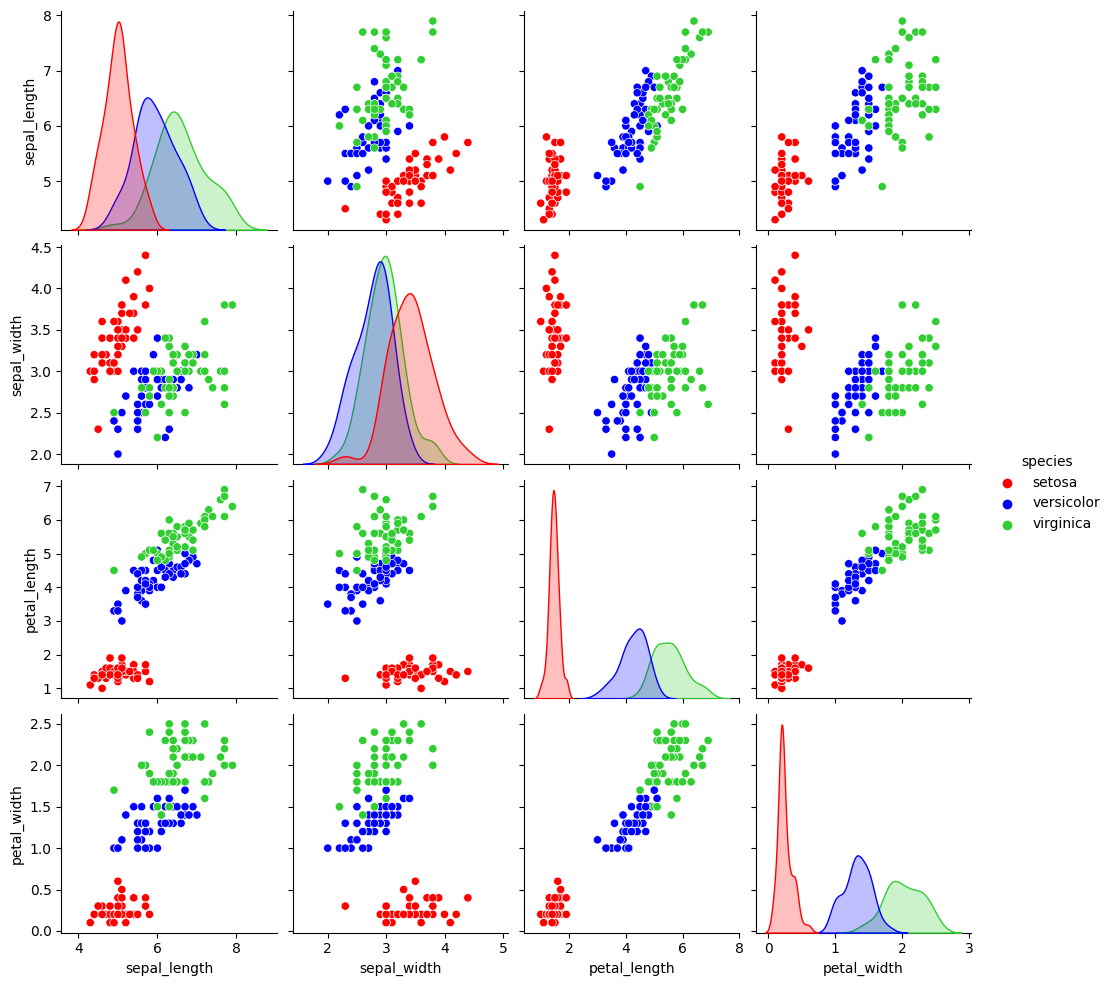

In [5]:
# 4. Scatter Matrix

sns.pairplot(data = df, hue = 'species', palette = ['Red', 'Blue', 'limegreen']);
# plt.savefig('pairplot.png')

C:\Users\tharg\AppData\Local\Temp\ipykernel_5548\2910584857.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


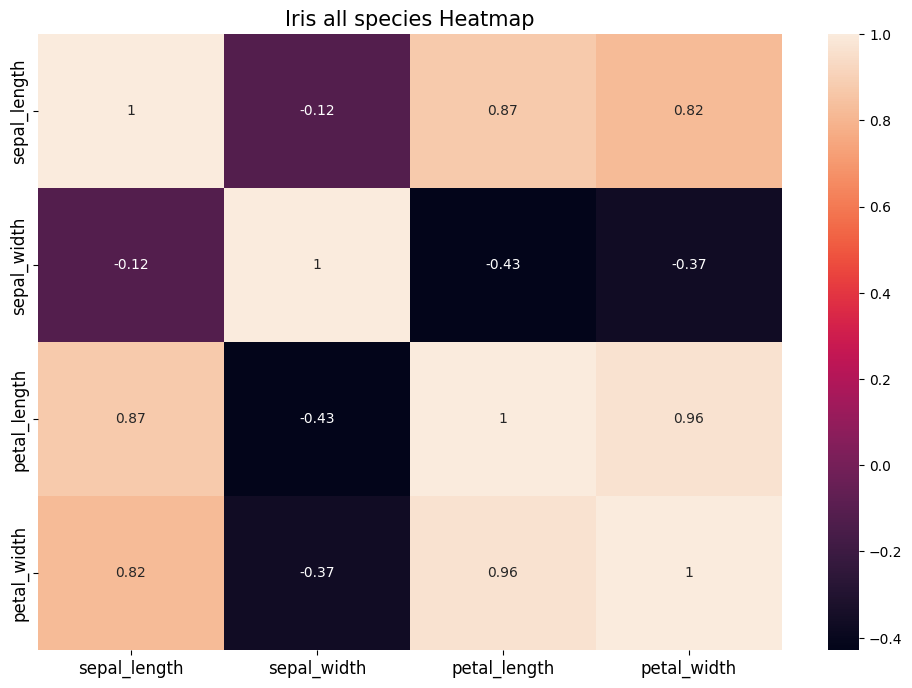

In [6]:
# 3. Data Heatmap, all species together is misleading

df_corr = df.corr()


plt.figure(figsize=(12, 8));

sns.heatmap(
    df_corr, annot=True,  # cmap = 'Blues',
    xticklabels=df_corr.columns.values,
    yticklabels=df_corr.columns.values
);

plt.title('Iris all species Heatmap', fontsize=15);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

In [7]:
# group species to inspect differences.

df_setosa = df[df.species == "setosa"]
df_versicolor = df[df.species == "versicolor"]
df_virginica = df[df.species == "virginica"]
df_setosa.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [8]:
df_correlate_setosa = df_setosa.corr()
df_correlate_setosa

C:\Users\tharg\AppData\Local\Temp\ipykernel_5548\2291507871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlate_setosa = df_setosa.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.742547,0.267176,0.278098
sepal_width,0.742547,1.000000,0.177700,0.232752
petal_length,0.267176,0.177700,1.000000,0.331630
petal_width,0.278098,0.232752,0.331630,1.000000


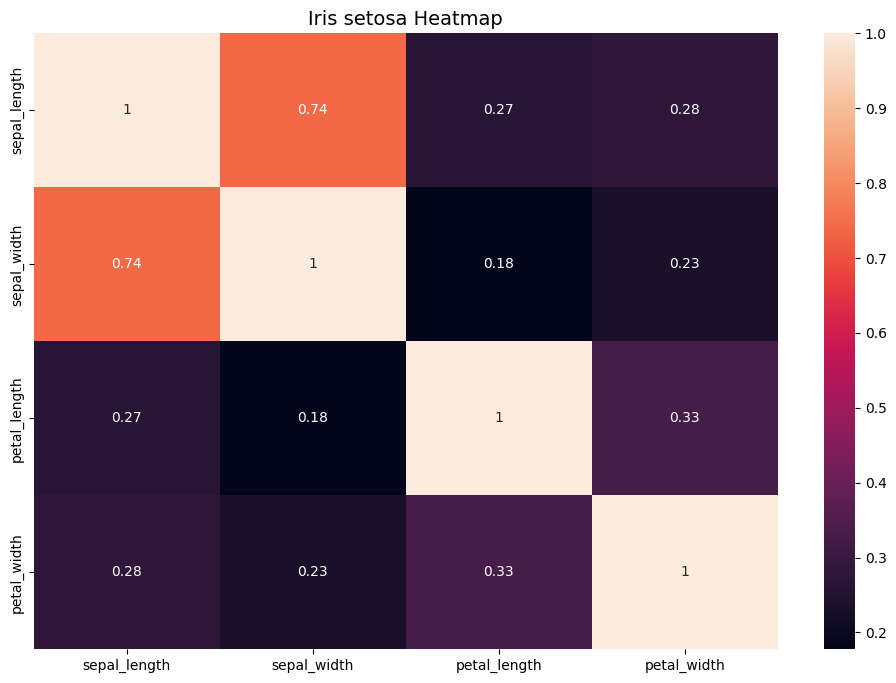

In [9]:
plt.figure(figsize=(12, 8));

sns.heatmap(
    df_correlate_setosa, annot=True,  # cmap = 'Blues',
    xticklabels=df_correlate_setosa.columns.values,
    yticklabels=df_correlate_setosa.columns.values
);

plt.title('Iris setosa Heatmap', fontsize=14);
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);

C:\Users\tharg\AppData\Local\Temp\ipykernel_5548\351903043.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlate_versicolor = df_versicolor.corr()


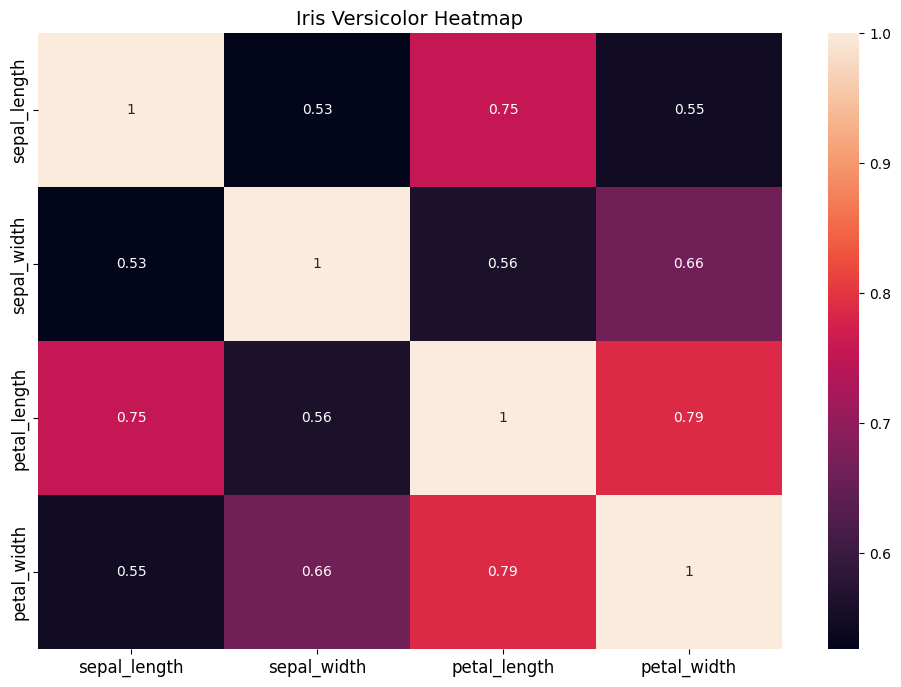

In [10]:
df_correlate_versicolor = df_versicolor.corr()

plt.figure(figsize=(12, 8));

sns.heatmap(
    df_correlate_versicolor, annot=True,  # cmap = 'Blues',
    xticklabels=df_correlate_versicolor.columns.values,
    yticklabels=df_correlate_versicolor.columns.values
);

plt.title('Iris Versicolor Heatmap', fontsize=14);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

C:\Users\tharg\AppData\Local\Temp\ipykernel_5548\1581970260.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlate_virginica = df_virginica.corr()


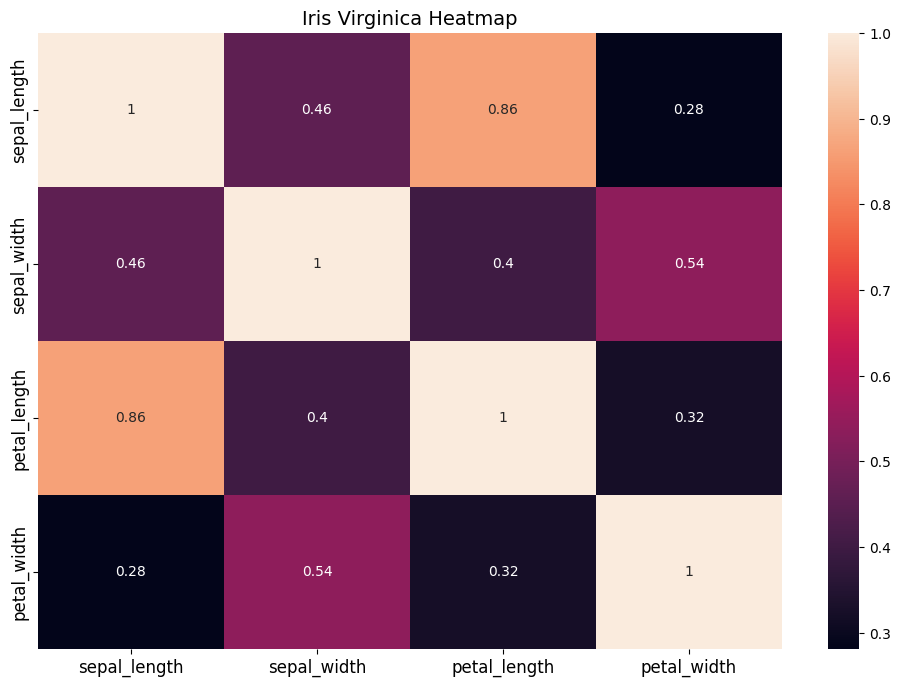

In [11]:
df_correlate_virginica = df_virginica.corr()

plt.figure(figsize=(12, 8));

sns.heatmap(
    df_correlate_virginica, annot=True,  # cmap = 'Blues',
    xticklabels=df_correlate_virginica.columns.values,
    yticklabels=df_correlate_virginica.columns.values
);

plt.title('Iris Virginica Heatmap', fontsize=14);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

## Apply Naive Bayes on Iris dataset

In [12]:
X, y = load_iris(return_X_y=True)

In [13]:
X[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [14]:
type(X)

numpy.ndarray

In [15]:
y[:3]

array([0, 0, 0])

In [16]:
type(y)

numpy.ndarray

In [17]:
np.unique(y)

array([0, 1, 2])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [19]:
model = GaussianNB()

In [20]:
fit_model = model.fit(X_train, y_train)

In [21]:
y_pred = fit_model.predict(X_test)

In [22]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 38 points : 0


In [23]:
fit_model.score(X_test, y_test)

1.0

In [24]:
fit_model.score(X_train, y_train)

0.9464285714285714

In [25]:
print(fit_model.predict([[5.1, 3.5, 1.4, 0.2]]))  # mind the two [[]] 

[0]


## Digits dataset

In [26]:
X, y = load_digits(return_X_y=True)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [28]:
model = GaussianNB()

In [29]:
fit_model = model.fit(X_train, y_train)

In [30]:
y_pred = fit_model.predict(X_test)

In [31]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 450 points : 75


In [32]:
75/450

0.16666666666666666